# Filter the data shared according to the classes in target variable and 
# do the following activities. (Data Set: EcomReviews_8k)
- Create frequency data frame 
- Plot word clouds for every class in the target variable using 

- bag of words 

- tf - idf

- bigrams

- trigrams

In [1]:
import re
import pandas as pd
import numpy as np

In [2]:
EcomReviews_8k=r"C:\TGushpu NLP\EcomReviews_8k (1).csv"

In [3]:
data=pd.read_csv(EcomReviews_8k)

In [4]:
data

,labels,text
0,__label__2,Rose Dawson Malaysia: All must buy the album o...
1,__label__2,a precious resource for Christian contemplatio...
2,__label__1,"Rename it to ""RedSox, Yankees and Giants"": I'v..."
3,__label__1,Boring!: This game is based on a great concept...
4,__label__1,Lost in the 70's: The Eurovision song contest ...
...,...,...
7995,__label__2,Very Helpful: Although I have a gram index on ...
7996,__label__1,Scratched up cd: When I got this cd and played...
7997,__label__2,"...in a few words, But Great Insight!: I was i..."
7998,__label__1,You get what you pay for: I bought this after ...


In [5]:
data.isnull().sum()

labels    0
text      0
dtype: int64

- No null values present in our data.

In [6]:
data['labels'].value_counts()

__label__1    4002
__label__2    3998
Name: labels, dtype: int64

- Data is balanced.

In [7]:
data['labels'].replace({"__label__1":1, "__label__2":2}, inplace=True)

- For convenience replacing **__label__1** in labels column as 1 and **__label__2** in labels column as 2.

In [8]:
data['labels'].value_counts()

1    4002
2    3998
Name: labels, dtype: int64

In [9]:
data.head()

,labels,text
0,2,Rose Dawson Malaysia: All must buy the album o...
1,2,a precious resource for Christian contemplatio...
2,1,"Rename it to ""RedSox, Yankees and Giants"": I'v..."
3,1,Boring!: This game is based on a great concept...
4,1,Lost in the 70's: The Eurovision song contest ...


##### Tokenization

In [10]:
import re
def tokenize(text):
    return re.findall(r'\w+',text)

In [11]:
import nltk

In [12]:
stop_words = nltk.corpus.stopwords.words('English')

In [13]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stop_words]

In [15]:
len(stop_words)

179

In [16]:
def prepare(text, pipeline):
    tokens=text
    for transform in pipeline:
        tokens=transform(tokens)
    return tokens

In [17]:
pipeline = [str.lower, tokenize, remove_stop,]

In [18]:
data['tokens']=data['text'].apply(prepare,pipeline=pipeline)

In [19]:
data['num_tokens']=data['tokens'].apply(len)

In [20]:
data['text_len']=data['text'].apply(len)

In [21]:
data.head()

,labels,text,tokens,num_tokens,text_len
0,2,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let...",19,205
1,2,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,...",66,655
2,1,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus...",59,660
3,1,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s...",26,256
4,1,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go...",46,511


In [22]:
data['text']

0       Rose Dawson Malaysia: All must buy the album o...
1       a precious resource for Christian contemplatio...
2       Rename it to "RedSox, Yankees and Giants": I'v...
3       Boring!: This game is based on a great concept...
4       Lost in the 70's: The Eurovision song contest ...
                              ...                        
7995    Very Helpful: Although I have a gram index on ...
7996    Scratched up cd: When I got this cd and played...
7997    ...in a few words, But Great Insight!: I was i...
7998    You get what you pay for: I bought this after ...
7999    Really Cool and Easy to use!: Third digital ca...
Name: text, Length: 8000, dtype: object

In [23]:
data['tokens'][0]

['rose',
 'dawson',
 'malaysia',
 'must',
 'buy',
 'album',
 'let',
 'talk',
 'love',
 'interesting',
 'information',
 'already',
 'heard',
 'song',
 'heart',
 'go',
 '566',
 'times',
 'believe']

##### Bag of words

In [24]:
tokens=data['tokens'][0]
bow = dict.fromkeys(tokens,0)

for i in bow:
    bow[i]=tokens.count(i)

In [25]:
bow

{'rose': 1,
 'dawson': 1,
 'malaysia': 1,
 'must': 1,
 'buy': 1,
 'album': 1,
 'let': 1,
 'talk': 1,
 'love': 1,
 'interesting': 1,
 'information': 1,
 'already': 1,
 'heard': 1,
 'song': 1,
 'heart': 1,
 'go': 1,
 '566': 1,
 'times': 1,
 'believe': 1}

##### For entire column

In [26]:
from collections import Counter

In [27]:
counter=Counter(tokens)

In [28]:
print(counter)

Counter({'rose': 1, 'dawson': 1, 'malaysia': 1, 'must': 1, 'buy': 1, 'album': 1, 'let': 1, 'talk': 1, 'love': 1, 'interesting': 1, 'information': 1, 'already': 1, 'heard': 1, 'song': 1, 'heart': 1, 'go': 1, '566': 1, 'times': 1, 'believe': 1})


In [29]:
counter.most_common(10)

[('rose', 1),
 ('dawson', 1),
 ('malaysia', 1),
 ('must', 1),
 ('buy', 1),
 ('album', 1),
 ('let', 1),
 ('talk', 1),
 ('love', 1),
 ('interesting', 1)]

##### Convert this into a dataframe

In [30]:
def count_words (data,column='tokens',preprocess=None,min_freq=2):
    
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    counter=Counter()
    data[column].apply(update)
    
    freq_df = pd.DataFrame.from_dict(counter,orient='index',columns=['freq'])
    freq_df = freq_df.query('freq>@min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq',ascending=False)

In [31]:
freq_df = count_words(data)

In [32]:
freq_df

,freq
token,
book,4389
one,3070
great,2379
good,2298
like,2245
...,...
bouts,3
bossa,3
ankle,3


In [33]:
freq_df.head(10)

,freq
token,
book,4389
one,3070
great,2379
good,2298
like,2245
would,1826
read,1615
get,1514
time,1491


##### Plotting the df

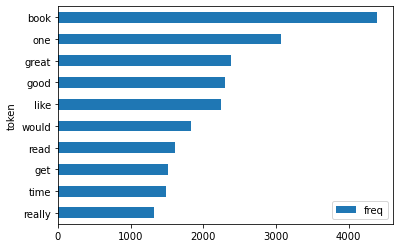

In [34]:
ax = freq_df.head(10).plot(kind='barh')
ax.invert_yaxis()

In [35]:
preprocess = lambda text:re.findall(r'\w{10,}',text)

In [36]:
freq_df2 = count_words(data,column='text',preprocess = preprocess)

In [37]:
freq_df2

,freq
token,
characters,404
disappointed,333
interesting,273
information,268
understand,212
...,...
temporarily,3
screeching,3
transferring,3


- In freq_df = 11123 rows and 1 column
- In freq_df2 = 1380 rows and 1 column

# Word Clouds

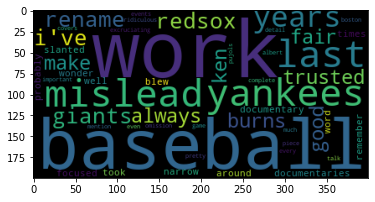

In [38]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = data.query("labels == 1")['text'].values[0].lower()

wc = WordCloud(max_words = 100, stopwords = stop_words)
wc.generate(text)
plt.imshow(wc)

In [39]:
def wordcloud(word_freq, title = None, max_words = 200, stopwords = None):
    wc = WordCloud(max_words = 100, stopwords = stopwords)
    
    if type(word_freq) == pd.Series: 
        counter = Counter(word_freq.fillna(0).to_dict())  
    else:
        counter = word_freq
        
    if stopwords is not None:  
        counter = {token:freq for (token,freq) in counter.items() if token not in stopwords}
    wc.generate_from_frequencies(counter)
    plt.title(title)
    ax = plt.imshow(wc)
    ax = plt.axis("off")

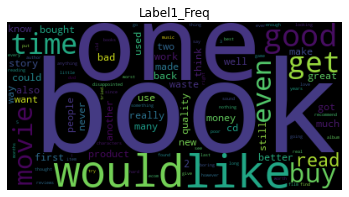

In [40]:
freq_label1_df = count_words(data[data['labels'] == 1])
plt.figure()
wordcloud(freq_label1_df['freq'], max_words = 100,title='Label1_Freq')

In [41]:
freq_label1_df

,freq
token,
book,2168
one,1541
like,1167
would,1108
good,973
...,...
jason,3
beggining,3
competent,3


##### Bag of words

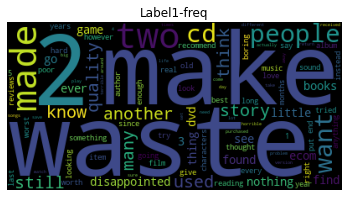

In [42]:
wordcloud(freq_label1_df['freq'], max_words = 100, stopwords =freq_label1_df.head(30).index,title='Label1-freq')

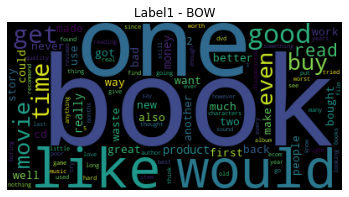

In [75]:
wordcloud(freq_label1_df['freq'], stopwords = ['1'],title="Label1 - BOW")

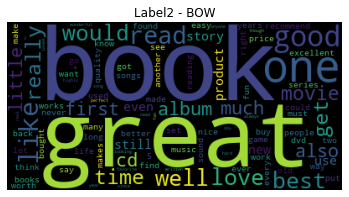

In [74]:
wordcloud(freq_label2_df['freq'], stopwords = ['1','2'],title="Label2 - BOW")

#####  With bow we are not getting much information we use TF-IDF

In [43]:
def compute_idf(data, column = 'tokens', preprocess = None, min_data=2):
    def update(doc): 
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    counter = Counter()
    data[column].apply(update)
    
    idf_df = pd.DataFrame.from_dict(counter, orient = 'index',columns=['data'])
    idf_df = idf_df.query('data>@min_data')
    idf_df['idf'] = np.log(len(data)/idf_df['data']) + 0.1
    
    freq_df.index.name = 'token'
    return idf_df.sort_values(by='data', ascending = False)
    

In [44]:
idf_df = compute_idf(data)

C:\Users\kushp\AppData\Local\Temp\ipykernel_18508\3737073246.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(data)/idf_df['data']) + 0.1


In [45]:
idf_df

,data,idf
one,2279,1.355705
book,2049,1.462090
great,1769,1.609027
good,1749,1.620397
like,1704,1.646463
...,...,...
understandable,3,7.988585
becky,3,7.988585
emphasizes,3,7.988585
restrained,3,7.988585


- Where df is the document frequency column and idf is inverse document frequency column

# Now we need to multiply tf * idf

In [46]:
idf_df.sort_values('idf',ascending = False)

,data,idf
retriever,3,7.988585
discourse,3,7.988585
wry,3,7.988585
columbia,3,7.988585
alarms,3,7.988585
...,...,...
like,1704,1.646463
good,1749,1.620397
great,1769,1.609027
book,2049,1.462090


In [47]:
freq_df['tfidf'] = freq_df ['freq']*idf_df['idf']

In [48]:
freq_df['tfidf']

token
book          6417.111572
one           4162.013710
great         3827.875534
good          3723.673100
like          3696.309689
                 ...     
bouts           23.965754
bossa           23.965754
ankle           23.965754
pricy           23.965754
storylines      23.965754
Name: tfidf, Length: 11123, dtype: float64

In [49]:
freq_df.sort_values(by='tfidf')

,freq,tfidf
token,,
storylines,3,23.965754
salvation,3,23.965754
doggie,3,23.965754
inappropriate,3,23.965754
unsatisfying,3,23.965754
...,...,...
cubic,3,NaN
lather,3,NaN
shrink,3,NaN


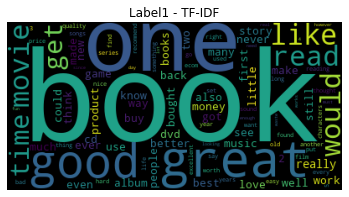

In [73]:
wordcloud(freq_df['tfidf'], stopwords = ['1'],title="Label1 - TF-IDF")

Plot by labels

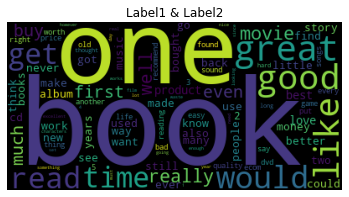

In [50]:
freq_label1_df = count_words(data[data['labels'] == 1])
freq_label2_df = count_words(data[data['labels'] == 2]) 

freq_label1_df['tfidf'] = freq_label1_df['freq']*idf_df['idf']
freq_label2_df['tfidf'] = freq_label2_df['freq']*idf_df['idf']

wordcloud(freq_df['freq'],title="Label1 & Label2")

### We are not getting much information on tfidf 

In [51]:
def ngrams(tokens, n=2, sep=' ',stopwords=stop_words):
    return[sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)]) if len([t for t in ngram if t in stop_words])==0]

#####  Adding this ngrams to pipeline

In [52]:
data['bigrams'] = data['text'].apply(prepare,pipeline=[str.lower,tokenize])\
.apply(ngrams,n=2,stopwords=stop_words)

In [53]:
data.loc[0:5,'text'].apply(prepare,pipeline=[str.lower,tokenize])\
.apply(ngrams,n=2,stopwords=stop_words)

0    [rose dawson, dawson malaysia, must buy, alrea...
1    [precious resource, christian contemplation, b...
2    [redsox yankees, always trusted, trusted ken, ...
3    [great concept, falls short, really bad, contr...
4    [eurovision song, song contest, good songs, so...
5    [joan hart, acting drives, crazy melissa, meli...
Name: text, dtype: object

In [54]:
data.head()

,labels,text,tokens,num_tokens,text_len,bigrams
0,2,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let...",19,205,"[rose dawson, dawson malaysia, must buy, alrea..."
1,2,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,...",66,655,"[precious resource, christian contemplation, b..."
2,1,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus...",59,660,"[redsox yankees, always trusted, trusted ken, ..."
3,1,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s...",26,256,"[great concept, falls short, really bad, contr..."
4,1,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go...",46,511,"[eurovision song, song contest, good songs, so..."


# To get more insights using wordcloud for this bigrams

In [55]:
idf_df_bigram = compute_idf(data,column = 'bigrams',min_data=10)

C:\Users\kushp\AppData\Local\Temp\ipykernel_18508\3737073246.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(data)/idf_df['data']) + 0.1


In [56]:
idf_df_bigram

,data,idf
year old,148,4.089985
highly recommend,128,4.235167
much better,127,4.243010
even though,103,4.452468
great book,98,4.502229
...,...,...
might want,11,6.689302
ever written,11,6.689302
nice book,11,6.689302
pretty well,11,6.689302


In [57]:
freq_df_label1_bigrams = count_words(data[data['labels']==1],column='bigrams')

In [58]:
freq_df_label1_bigrams

,freq
token,
much better,77
year old,63
even though,52
one star,48
poor quality,48
...,...
law order,3
go somewhere,3
would come,3


In [59]:
freq_df_label1_bigrams['tfidf'] = freq_df_label1_bigrams['freq']*idf_df_bigram['idf']

In [60]:
freq_df_label1_bigrams

,freq,tfidf
token,,
much better,77,326.711750
year old,63,257.669026
even though,52,231.528327
one star,48,249.378073
poor quality,48,254.544345
...,...,...
law order,3,NaN
go somewhere,3,NaN
would come,3,NaN


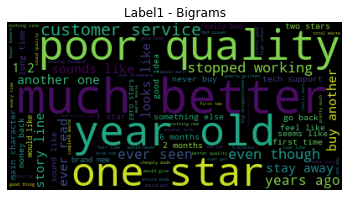

In [72]:
wordcloud(freq_df_label1_bigrams['tfidf'], stopwords = ['1','2'],title="Label1 - Bigrams")

# To get more insights using wordcloud for this trigrams

In [61]:
data['trigrams'] = data['text'].apply(prepare,pipeline=[str.lower,tokenize])\
.apply(ngrams,n=3,stopwords=stop_words)

In [62]:
idf_df_trigram = compute_idf(data,column = 'trigrams',min_data=10)

C:\Users\kushp\AppData\Local\Temp\ipykernel_18508\3737073246.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(data)/idf_df['data']) + 0.1


In [63]:
idf_df_trigram

,data,idf
would highly recommend,23,5.951703
year old son,21,6.042674
2 year old,17,6.253983
5 year old,16,6.314608
worth every penny,16,6.314608
3 year old,13,6.522247
4 year old,13,6.522247
year old daughter,12,6.602290
buy another one,11,6.689302
2 1 2,11,6.689302


In [64]:
freq_df_label1_trigrams = count_words(data[data['labels']==1],column='trigrams')

In [65]:
freq_df_label1_trigrams

,freq
token,
year old son,8
never buy another,8
buy another one,8
really looking forward,8
2 year old,7
...,...
stay far away,3
platano records edition,3
much better book,3


In [66]:
freq_df_label1_trigrams['tfidf'] = freq_df_label1_trigrams['freq']*idf_df_trigram['idf']

In [67]:
freq_df_label1_trigrams

,freq,tfidf
token,,
year old son,8,48.341395
never buy another,8,NaN
buy another one,8,53.514412
really looking forward,8,NaN
2 year old,7,43.777884
...,...,...
stay far away,3,NaN
platano records edition,3,NaN
much better book,3,NaN


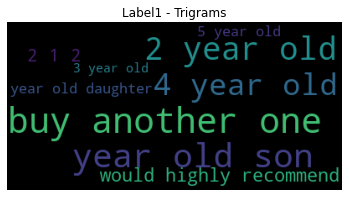

In [71]:
wordcloud(freq_df_label1_trigrams['tfidf'], stopwords = ['1','2'],title="Label1 - Trigrams")

# Concating unigrams, bigrams & trigrams

In [77]:
freq_df_label1_ngrams = pd.concat([freq_label1_df,freq_df_label1_bigrams,freq_df_label1_trigrams])

In [69]:
freq_df_label1_ngrams

,freq,tfidf
token,,
book,2168,3169.810410
one,1541,2089.141084
like,1167,1921.422453
would,1108,1972.977287
good,973,1576.646617
...,...,...
stay far away,3,NaN
platano records edition,3,NaN
much better book,3,NaN


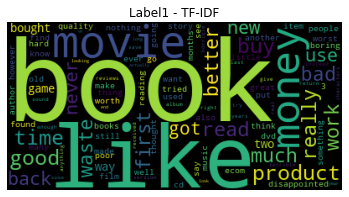

In [70]:
wordcloud(freq_df_label1_ngrams['tfidf'], stopwords = ['1','2','one','would','get','could','even'],title="Label1 - TF-IDF")

# INSIGHTS:-

- **much better**, **poor quality** and **one star** are negative reviews and **highly recommend**, **great** and **good** are positive reviews. 
- **Book**, **Like**, **Movie**, **Product** and **Money** are most important words in this EcomReviews_8k dataset.